# Plot smaller size plot

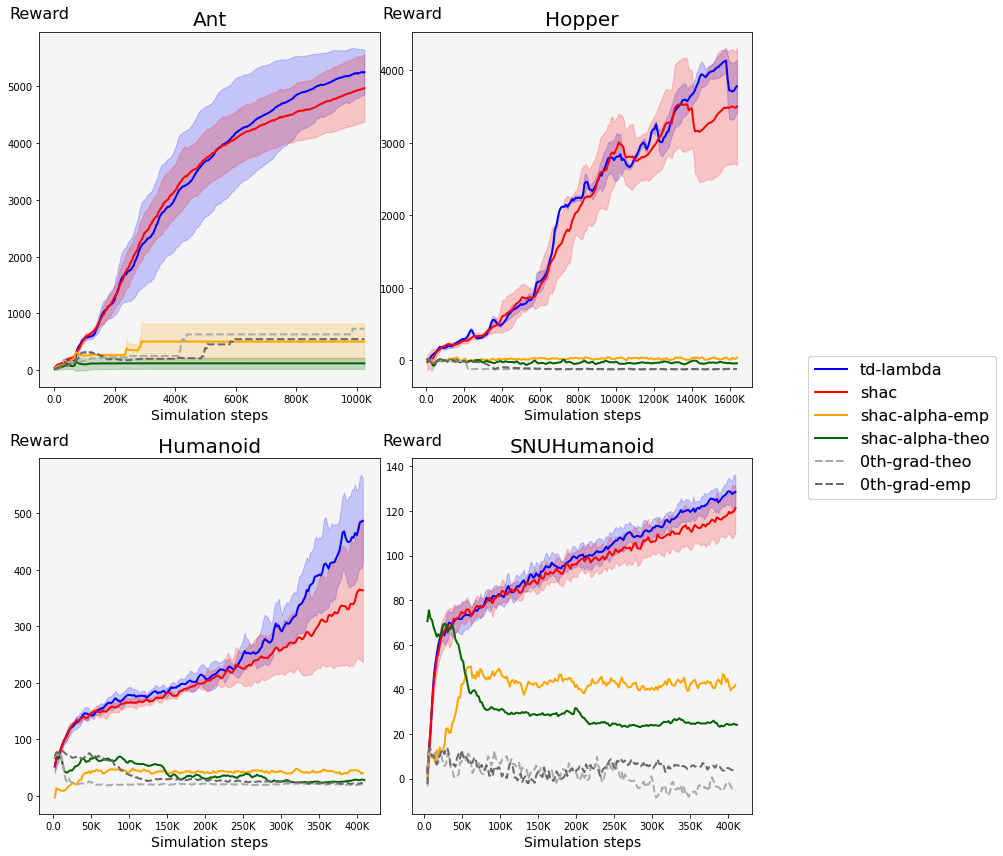

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

plt.style.use('mplstyle.txt')

base_path = './'

envs = ['Ant', 'Hopper', 'Humanoid', 'SNUHumanoid']

font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 16}

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

for i, env in enumerate(envs):
    # metadata
    axs[i//2, i%2].set_title(env)
    axs[i//2, i%2].set(xlabel='Simulation steps')
    axs[i//2, i%2].set_facecolor('whitesmoke')
    
    # Position y-axis label at the top
    axs[i//2, i%2].text(0.0, 1.05, 'Reward', ha='center', va='center', transform=axs[i//2, i%2].transAxes, fontsize=font['size'])

    # load data
    td_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'td', str(i) + '.txt'), delimiter=', ') for i in range(5)])
    shac_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac', str(i) + '.txt'), delimiter=', ') for i in range(5)])
    shac_alpha_0_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha_0', str(i) + '.txt'), delimiter=', ') for i in range(1)])
    shac_alpha_emp_0_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha_emp_0', str(i) + '.txt'), delimiter=', ') for i in range(1)])
    # special case for Ant
    if env == 'Ant':
        shac_alpha_emp_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha_emp', str(i) + '.txt'), delimiter=', ') for i in range(3)])
        shac_alpha_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha', str(i) + '.txt'), delimiter=', ') for i in range(3)]) 
    else:
        shac_alpha_emp_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha_emp', str(i) + '.txt'), delimiter=', ') for i in range(1)])
        shac_alpha_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha', str(i) + '.txt'), delimiter=', ') for i in range(1)])

    steps = np.genfromtxt(os.path.join(base_path, env, 'steps.txt'), delimiter=', ')  # same for both td and shac

    # mean and std
    td_mean = np.mean(td_rews, axis=0)
    td_std = np.std(td_rews, axis=0)
    shac_mean = np.mean(shac_rews, axis=0)
    shac_std = np.std(shac_rews, axis=0)

    shac_alpha_0_mean = np.mean(shac_alpha_0_rews, axis=0)
    shac_alpha_0_std = np.std(shac_alpha_0_rews, axis=0)
    shac_alpha_mean = np.mean(shac_alpha_rews, axis=0)
    shac_alpha_std = np.std(shac_alpha_rews, axis=0)

    shac_alpha_emp_0_mean = np.mean(shac_alpha_emp_0_rews, axis=0)
    shac_alpha_emp_0_std = np.std(shac_alpha_emp_0_rews, axis=0)
    shac_alpha_emp_mean = np.mean(shac_alpha_emp_rews, axis=0)
    shac_alpha_emp_std = np.std(shac_alpha_emp_rews, axis=0)
    # plot
    td_color, shac_color, shac_alpha_0_color, shac_alpha_emp_0_color, shac_alpha_emp_color, shac_alpha_color = 'blue', 'red', 'darkgray', 'dimgray', 'orange', 'darkgreen'
    axs[i//2, i%2].plot(steps[0:len(shac_alpha_emp_mean)], td_mean[0:len(shac_alpha_emp_mean)], color=td_color, label='td-lambda')
    axs[i//2, i%2].fill_between(steps[0:len(shac_alpha_emp_mean)], td_mean[0:len(shac_alpha_emp_mean)] + td_std[0:len(shac_alpha_emp_mean)], td_mean[0:len(shac_alpha_emp_mean)] - td_std[0:len(shac_alpha_emp_mean)], color=td_color, alpha=0.2)
    axs[i//2, i%2].plot(steps[0:len(shac_alpha_emp_mean)], shac_mean[0:len(shac_alpha_emp_mean)], color=shac_color, label='shac')
    axs[i//2, i%2].fill_between(steps[0:len(shac_alpha_emp_mean)], shac_mean[0:len(shac_alpha_emp_mean)] + shac_std[0:len(shac_alpha_emp_mean)], shac_mean[0:len(shac_alpha_emp_mean)] - shac_std[0:len(shac_alpha_emp_mean)], color=shac_color, alpha=0.2)

    axs[i//2, i%2].plot(steps[0:len(shac_alpha_emp_mean)], shac_alpha_emp_mean, color=shac_alpha_emp_color, linestyle = '-', label='shac-alpha-emp')
    axs[i//2, i%2].plot(steps[0:len(shac_alpha_mean)], shac_alpha_mean, color=shac_alpha_color, linestyle = '-', label='shac-alpha-theo')
    # special case for Ant
    if env == 'Ant':
        axs[i//2, i%2].fill_between(steps[0:len(shac_alpha_emp_mean)], shac_alpha_emp_mean + shac_alpha_emp_std, shac_alpha_emp_mean - shac_alpha_emp_std, color=shac_alpha_emp_color, alpha=0.2)
        axs[i//2, i%2].fill_between(steps[0:len(shac_alpha_mean)], shac_alpha_mean + shac_alpha_std, shac_alpha_mean - shac_alpha_std, color=shac_alpha_color, alpha=0.2)

    axs[i//2, i%2].plot(steps[0:len(shac_alpha_emp_mean)], shac_alpha_0_mean[0:len(shac_alpha_emp_mean)], color=shac_alpha_0_color, linestyle = '--', label='0th-grad-theo')
    axs[i//2, i%2].plot(steps[0:len(shac_alpha_emp_mean)], shac_alpha_emp_0_mean[0:len(shac_alpha_emp_mean)], color=shac_alpha_emp_0_color, linestyle = '--', label='0th-grad-emp')


    # Adding labels directly on the plot
    
    #axs[i].legend()

    # Define a function to format the tick labels
    def format_func(value, tick_number):
        if value >= 1000:
            return f'{int(value/1000)}K'
        else:
            return f'{value}'

    # Set the x-axis formatter to use the custom function
    axs[i//2, i%2].xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
    handles, labels = axs[i//2, i%2].get_legend_handles_labels()
    fig.tight_layout()

    fig.legend(handles, labels, loc=7,
          fancybox=True, ncol=1)
    fig.subplots_adjust(right=0.75)

plt.savefig('plot_min_length.pdf')


# Plot with max length

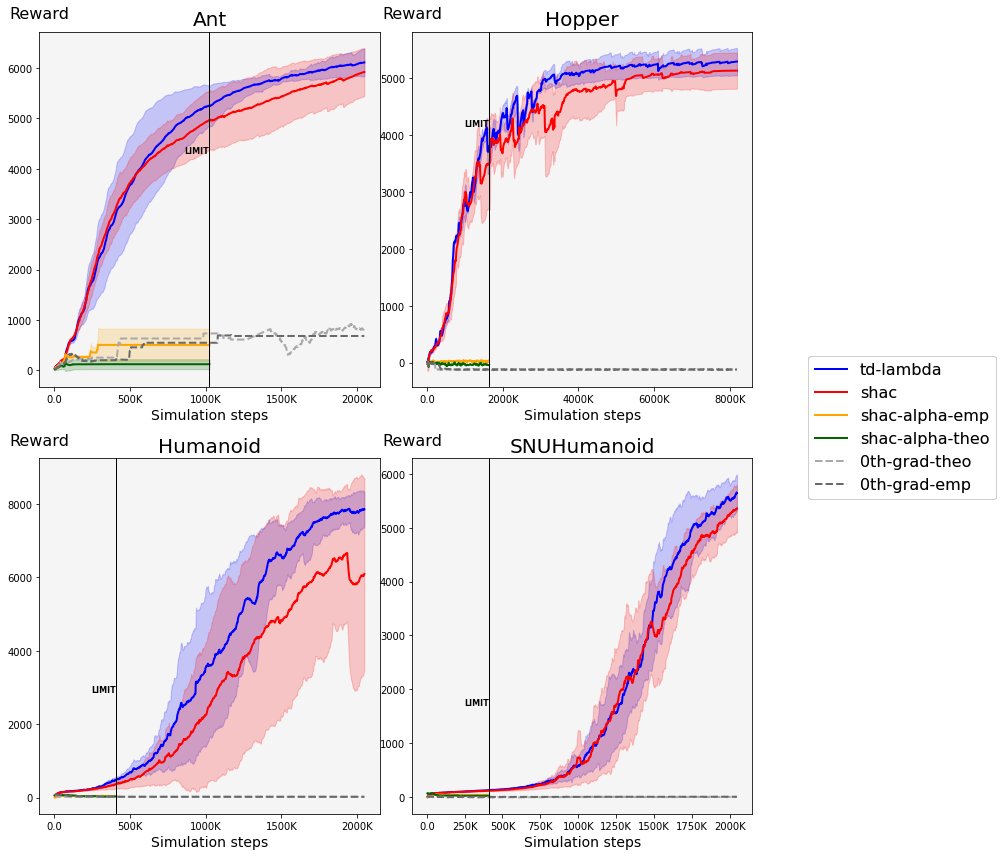

In [129]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

plt.style.use('mplstyle.txt')

base_path = './'

envs = ['Ant', 'Hopper', 'Humanoid', 'SNUHumanoid']

font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 16}

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

for i, env in enumerate(envs):
    # metadata
    axs[i//2, i%2].set_title(env)
    axs[i//2, i%2].set(xlabel='Simulation steps')
    axs[i//2, i%2].set_facecolor('whitesmoke')
    
    # Position y-axis label at the top
    axs[i//2, i%2].text(0.0, 1.05, 'Reward', ha='center', va='center', transform=axs[i//2, i%2].transAxes, fontsize=font['size'])

    # load data
    td_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'td', str(i) + '.txt'), delimiter=', ') for i in range(5)])
    shac_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac', str(i) + '.txt'), delimiter=', ') for i in range(5)])
    shac_alpha_0_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha_0', str(i) + '.txt'), delimiter=', ') for i in range(1)])
    shac_alpha_emp_0_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha_emp_0', str(i) + '.txt'), delimiter=', ') for i in range(1)])
    # special case for Ant
    if env == 'Ant':
        shac_alpha_emp_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha_emp', str(i) + '.txt'), delimiter=', ') for i in range(3)])
        shac_alpha_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha', str(i) + '.txt'), delimiter=', ') for i in range(3)]) 
    else:
        shac_alpha_emp_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha_emp', str(i) + '.txt'), delimiter=', ') for i in range(1)])
        shac_alpha_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac_alpha', str(i) + '.txt'), delimiter=', ') for i in range(1)])

    steps = np.genfromtxt(os.path.join(base_path, env, 'steps.txt'), delimiter=', ')  # same for both td and shac

    # mean and std
    td_mean = np.mean(td_rews, axis=0)
    td_std = np.std(td_rews, axis=0)
    shac_mean = np.mean(shac_rews, axis=0)
    shac_std = np.std(shac_rews, axis=0)

    shac_alpha_0_mean = np.mean(shac_alpha_0_rews, axis=0)
    shac_alpha_0_std = np.std(shac_alpha_0_rews, axis=0)
    shac_alpha_mean = np.mean(shac_alpha_rews, axis=0)
    shac_alpha_std = np.std(shac_alpha_rews, axis=0)

    shac_alpha_emp_0_mean = np.mean(shac_alpha_emp_0_rews, axis=0)
    shac_alpha_emp_0_std = np.std(shac_alpha_emp_0_rews, axis=0)
    shac_alpha_emp_mean = np.mean(shac_alpha_emp_rews, axis=0)
    shac_alpha_emp_std = np.std(shac_alpha_emp_rews, axis=0)
    # plot
    td_color, shac_color, shac_alpha_0_color, shac_alpha_emp_0_color, shac_alpha_emp_color, shac_alpha_color = 'blue', 'red', 'darkgray', 'dimgray', 'orange', 'darkgreen'
    axs[i//2, i%2].plot(steps, td_mean, color=td_color, label='td-lambda')
    axs[i//2, i%2].fill_between(steps, td_mean + td_std, td_mean - td_std, color=td_color, alpha=0.2)
    axs[i//2, i%2].plot(steps, shac_mean, color=shac_color, label='shac')
    axs[i//2, i%2].fill_between(steps, shac_mean + shac_std, shac_mean - shac_std, color=shac_color, alpha=0.2)
    
    axs[i//2, i%2].plot(steps[0:len(shac_alpha_emp_mean)], shac_alpha_emp_mean, color=shac_alpha_emp_color, linestyle = '-', label='shac-alpha-emp')
    axs[i//2, i%2].plot(steps[0:len(shac_alpha_mean)], shac_alpha_mean, color=shac_alpha_color, linestyle = '-', label='shac-alpha-theo')
    # special case for Ant
    if env == 'Ant':
        axs[i//2, i%2].fill_between(steps[0:len(shac_alpha_emp_mean)], shac_alpha_emp_mean + shac_alpha_emp_std, shac_alpha_emp_mean - shac_alpha_emp_std, color=shac_alpha_emp_color, alpha=0.2)
        axs[i//2, i%2].fill_between(steps[0:len(shac_alpha_mean)], shac_alpha_mean + shac_alpha_std, shac_alpha_mean - shac_alpha_std, color=shac_alpha_color, alpha=0.2)

    axs[i//2, i%2].plot(steps, shac_alpha_0_mean, color=shac_alpha_0_color, linestyle = '--', label='0th-grad-theo')
    axs[i//2, i%2].plot(steps, shac_alpha_emp_0_mean, color=shac_alpha_emp_0_color, linestyle = '--', label='0th-grad-emp')

    axs[i//2, i%2].axvline(x=steps[0:len(shac_alpha_emp_mean)][-1], color='black', linestyle='-',linewidth=1)
    axs[i//2, i%2].text(steps[0:len(shac_alpha_emp_mean)][-1], np.mean(shac_rews[0:len(shac_alpha_emp_mean)]), 'LIMIT', color='black', fontsize=8, ha='right', weight='bold')

    # Adding labels directly on the plot
    
    #axs[i].legend()

    # Define a function to format the tick labels
    def format_func(value, tick_number):
        if value >= 1000:
            return f'{int(value/1000)}K'
        else:
            return f'{value}'

    # Set the x-axis formatter to use the custom function
    axs[i//2, i%2].xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
    handles, labels = axs[i//2, i%2].get_legend_handles_labels()
    fig.tight_layout()

    fig.legend(handles, labels, loc=7,
          fancybox=True, ncol=1)
    fig.subplots_adjust(right=0.75)

plt.savefig('plot_max_length.pdf')


# Plot alpha_gamma


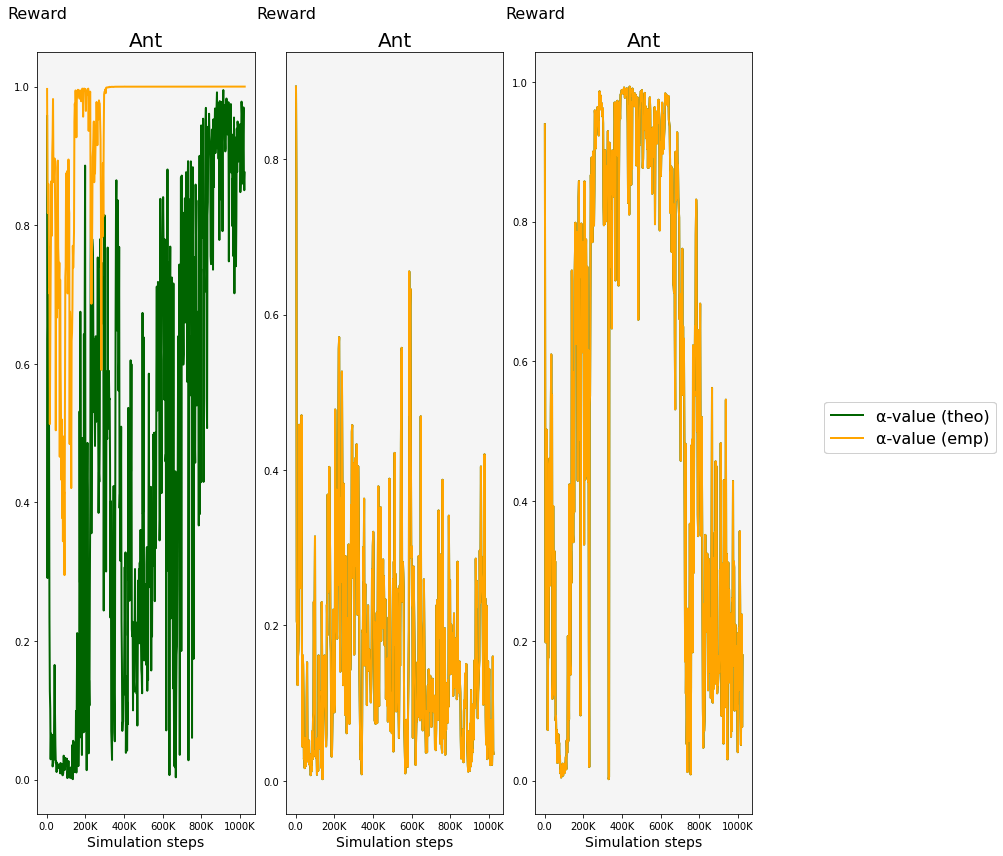

In [124]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

plt.style.use('mplstyle.txt')

base_path = './'

envs = ['Ant']

font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 16}

fig, axs = plt.subplots(1, 3, figsize=(14, 12))

for k in range(3):
    # metadata
    axs[k].set_title("Ant")
    axs[k].set(xlabel='Simulation steps')
    axs[k].set_facecolor('whitesmoke')
    
    # Position y-axis label at the top
    axs[k].text(0.0, 1.05, 'Reward', ha='center', va='center', transform=axs[k].transAxes, fontsize=font['size'])

    # load data
    shac_alpha_emp_rews = np.genfromtxt(os.path.join(base_path, "Ant", 'shac_alpha_emp', 'alpha_gamma_' + str(k) + '.txt'), delimiter=', ')
    shac_alpha_rews = np.genfromtxt(os.path.join(base_path, "Ant", 'shac_alpha', 'alpha_gamma_' + str(k) + '.txt'), delimiter=', ')

    steps = np.genfromtxt(os.path.join(base_path, env, 'steps.txt'), delimiter=', ')  # same for both td and shac

    # plot
    shac_alpha_emp_color, shac_alpha_color = 'orange', 'darkgreen'
    
    axs[k].plot(steps[0:len(shac_alpha_rews)], shac_alpha_rews, color=shac_alpha_color, linestyle = '-', label='α-value (theo)')

    axs[k].plot(steps[0:len(shac_alpha_emp_rews)], shac_alpha_emp_rews, color=shac_alpha_emp_color, linestyle = '-', label='α-value (emp)')

    # Adding labels directly on the plot
    
    #axs[i].legend()

    # Define a function to format the tick labels
    def format_func(value, tick_number):
        if value >= 1000:
            return f'{int(value/1000)}K'
        else:
            return f'{value}'

    # Set the x-axis formatter to use the custom function
    axs[k].xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
    handles, labels = axs[k].get_legend_handles_labels()
    fig.tight_layout()

    fig.legend(handles, labels, loc=7,
          fancybox=True, ncol=1)
    fig.subplots_adjust(right=0.75)

plt.savefig('plot_max_length.pdf')



In [8]:
read = np.genfromtxt(os.path.join(base_path, 'Hopper', 'td', str(i) + '.txt'), delimiter=', ')